In [4]:
import collections
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.optimize
import scipy.stats as st

# Numerical differentiation packages
import numdifftools as ndt

# Our main MCMC package
import emcee

# Import pyplot for plotting
import matplotlib.pyplot as plt

# Seaborn, useful for graphics
import seaborn as sns

# Corner is useful for displaying MCMC results
import corner

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)


In [ ]:
df= pd.read_csv()

In [ ]:
#The likelihood

def log_lkhd(x, l):
    
    if l < 0:
        return np.inf
    
    likelihood= np.sum(x)*np.log(l) - len(x)*l - scipy.special.gammaln(x)
    
    return likelihood

def lambda_prior(alpha, beta):
    
    if alpha < 0: 
        return np.inf
    if beta < 0:
        return np.inf
    
    prior= (alpha-1)*np.log(l) - beta*l - scipy.special.gammaln(alpha) + alpha*np.log(beta)
    

def log_posterior(params, X):
    
    #unpack parameters
    alpha, beta, L= params
    
    if len(L) != len(X):
        raise ValueError('Lengths of lambda and x must match')
    
    log_posterior= 0
    for i, row in enumerate(X):
        #calculate the poisson probability of that row
        log_posterior+= log_lkhd(row, L[i])
    
    log_posterior+= lambda_prior(alpha, beta)
    
    return log_posterior
    

In [32]:
df= pd.read_csv('../input/pumping_data.csv') #pumps per five seconds
df_tidy= pd.melt(df, 'time', var_name= 'worm', value_name= 'pumps')
df_tidy.head()
df_tidy['ppm']= df_tidy.pumps/5*60 #pumps per minute
df_tidy.dropna(inplace=True)

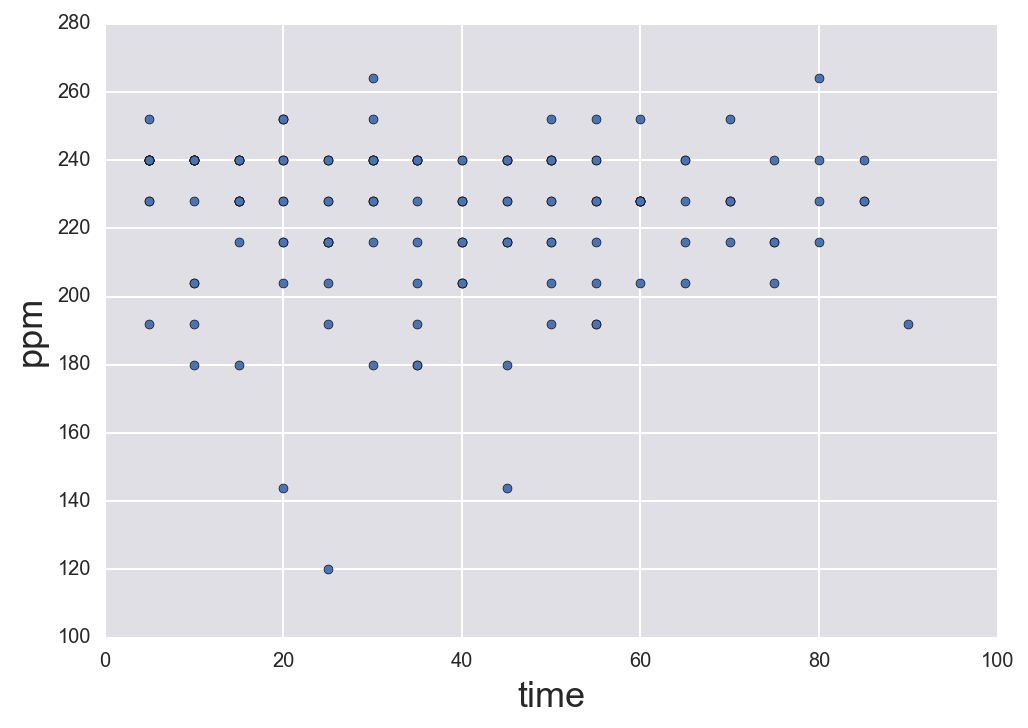

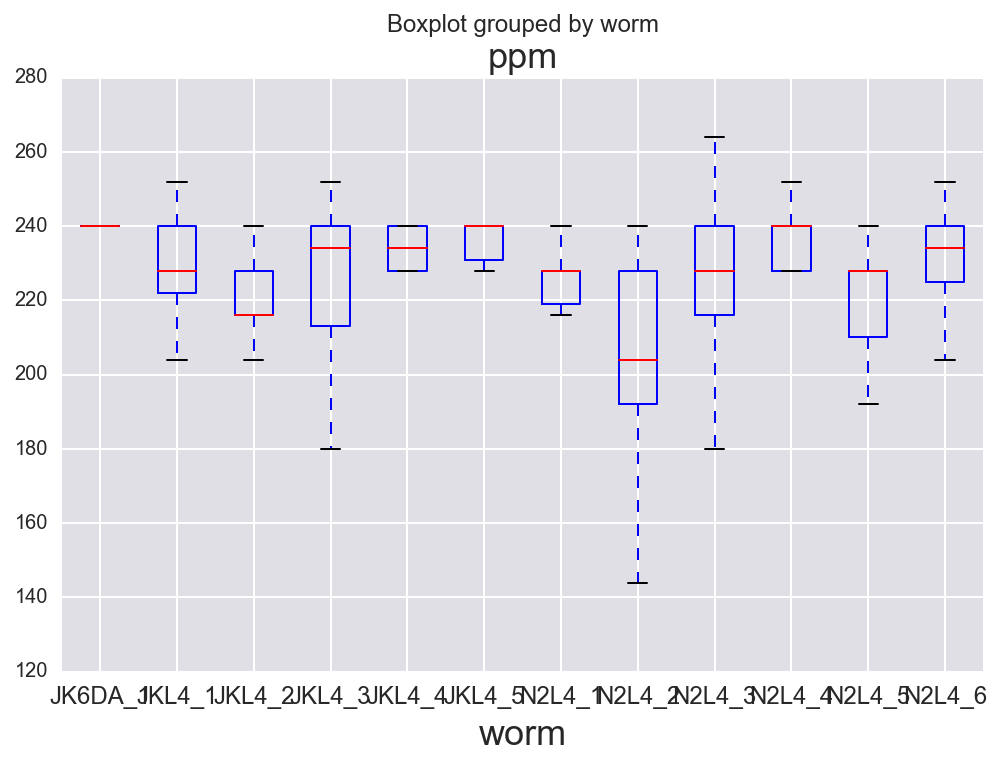

In [33]:
df_tidy.plot('time', 'ppm','scatter')
df_tidy.boxplot('ppm', 'worm')